## EDA


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from pandasql import sqldf
import seaborn as sns
from tqdm import tqdm
from sklearn.cluster import KMeans
from matplotlib import rc
import numpy as np
from yellowbrick.cluster import SilhouetteVisualizer
import math
import zipfile
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import os
os.name

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [2]:
info_data = pd.read_csv('C:/Users/JIEUN OH/OneDrive/바탕 화면/NH 공모전/경진대회 예선 데이터/cus_ifo.csv')
kr_data = pd.read_csv('C:/Users/JIEUN OH/OneDrive/바탕 화면/NH 공모전/경진대회 예선 데이터/kr_stk_orr.csv')
oss_data = pd.read_csv('C:/Users/JIEUN OH/OneDrive/바탕 화면/NH 공모전/경진대회 예선 데이터/oss_stk_orr.csv')
cus_tot_data = pd.read_csv('C:/Users/JIEUN OH/OneDrive/바탕 화면/NH 공모전/경진대회 예선 데이터/cus_tot_aet_ifo.csv')

### 1. info_data: 고객 정보 
- cus_no: 고객번호
- act_no: 계좌번호
- bse_ym: 고객정보기준년월
- cus_gb: 고객단말구분
- mts_mm_access_type: MTS 월단위접속패턴
- sex_dit_cd: 성별
- cus_age_stn_cd: 연령대
- cus_aet_stn_cd: 고객자산구간코드
- pft_amt_stn_cd: 수익금액구간코드
- fst_act_opn_dt: 최초계좌개설일
- stk_pdt_hdl_yn: 해외주식상품보유여부
- mrz_pdt_tp_sgm_cd: 주거래상품군
- lsg_sgm_cd: LIFESTAGE 세그먼트 코드
- tco_cus_grd_cd: 고객등급코드
- tot_ivs_te_sgm_cd: 총투자기간 세그먼트 코드
- hld_pdt_tp_sgm_cd: 보유상품유형 세그먼트 코드
- loy_sgm_cd: 충성도 세그먼트 코드
- mrz_mkt_dit_cd: 주거래시장 구분코드
- mrz_btp_dit_cd: 주거래업종 구분코드
- aet_bse_stk_trd_tp_cd: 자산기준주식 거래유형 코드
- bas_stk_trd_tp_cd: 기본주식 거래유형 코드

In [6]:
info_data.shape

(59081, 21)

In [11]:
info_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59081 entries, 0 to 59080
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cus_no                 59081 non-null  object 
 1   act_no                 59081 non-null  object 
 2   bse_ym                 59081 non-null  int64  
 3   mts_mm_access_type     59081 non-null  int64  
 4   sex_dit_cd             59081 non-null  int64  
 5   cus_age_stn_cd         59081 non-null  int64  
 6   cus_aet_stn_cd         59081 non-null  int64  
 7   pft_amt_stn_cd         59081 non-null  int64  
 8   fst_act_opn_dt         59081 non-null  int64  
 9   stk_pdt_hld_yn         59081 non-null  object 
 10  ose_stk_pdt_hld_yn     59081 non-null  object 
 11  mrz_pdt_tp_sgm_cd      59081 non-null  int64  
 12  lsg_sgm_cd             59081 non-null  int64  
 13  tco_cus_grd_cd         59081 non-null  int64  
 14  tot_ivs_te_sgm_cd      59081 non-null  int64  
 15  hl

In [20]:
# 열 이름 변경 
info_data = info_data.rename(columns={'cus_no' : '고객번호',
                                      'act_no' : '계좌번호',
                                      'bse_ym' : '고객정보기준년',
                                      'cus_gb' : '고객단말구분',
                                      'mts_mm_access_type' : 'MTS월단위접속패턴',
                                      'sex_dit_cd' : '성별',
                                      'cus_age_stn_cd': '연령대',
                                      'cus_aet_stn_cd' : '고객자산구간코드',
                                      'pft_amt_stn_cd' : '수익금액구간코드',
                                      'fst_act_opn_dt' : '최초계좌개설일',
                                      'stk_pdt_hld_yn' : '주식상품보유여부',
                                      'ose_stk_pdt_hld_yn' : '해외주식상품보유여부',
                                      'mrz_pdt_tp_sgm_cd' : '주거래상품',
                                      'lsg_sgm_cd' : 'LIFESTAGE세그먼트코드',
                                      'tco_cus_grd_cd' : '고객등급코드',
                                      'tot_ivs_te_sgm_cd' : '총투자기간세그먼트코드',
                                      'hld_pdt_tp_sgm_cd' : '보유상품유형세그먼트코드',
                                      'loy_sgm_cd' : '충성도세그먼트코드',
                                      'mrz_mkt_dit_cd' : '주거래시장구분코드',
                                      'mrz_btp_dit_cd' : '주거래업종구분코드',
                                      'aet_bse_stk_trd_tp_cd' : '자산기준주식거래유형코드',
                                      'bas_stk_trd_tp_cd' : '기본주식거래유형코드'
                          })

In [21]:
info_data.head()

,고객번호,계좌번호,고객정보기준년,MTS월단위접속패턴,성별,연령대,고객자산구간코드,수익금액구간코드,최초계좌개설일,주식상품보유여부,해외주식상품보유여부,주거래상품,LIFESTAGE세그먼트코드,고객등급코드,총투자기간세그먼트코드,보유상품유형세그먼트코드,충성도세그먼트코드,주거래시장구분코드,주거래업종구분코드,자산기준주식거래유형코드,기본주식거래유형코드
0,92ed7cdc3e3673226a613892c47a8eccfe602d0fbdb349...,3610f0105b67e30709e55c546c75c45b8c9d589e90fb9f...,202203,111111,1,4,1,1,20050309,Y,N,2,3,9,3,1.0,5.0,1.0,6.0,5.0,006
1,92ed7cdc3e3673226a613892c47a8eccfe602d0fbdb349...,3610f0105b67e30709e55c546c75c45b8c9d589e90fb9f...,202202,111111,1,4,1,1,20050309,Y,N,2,3,9,3,1.0,5.0,6.0,16.0,5.0,010
2,92ed7cdc3e3673226a613892c47a8eccfe602d0fbdb349...,3610f0105b67e30709e55c546c75c45b8c9d589e90fb9f...,202206,111111,1,4,1,1,20050309,Y,N,2,3,9,3,1.0,4.0,6.0,16.0,5.0,009
3,92ed7cdc3e3673226a613892c47a8eccfe602d0fbdb349...,3610f0105b67e30709e55c546c75c45b8c9d589e90fb9f...,202205,111111,1,4,1,1,20050309,Y,N,2,3,9,3,1.0,4.0,6.0,16.0,5.0,008
4,92ed7cdc3e3673226a613892c47a8eccfe602d0fbdb349...,3610f0105b67e30709e55c546c75c45b8c9d589e90fb9f...,202201,111111,1,4,1,1,20050309,Y,N,2,3,9,3,1.0,5.0,6.0,16.0,5.0,010


In [15]:
info_data.isnull().sum()

cus_no                      0
act_no                      0
bse_ym                      0
mts_mm_access_type          0
sex_dit_cd                  0
cus_age_stn_cd              0
cus_aet_stn_cd              0
pft_amt_stn_cd              0
fst_act_opn_dt              0
stk_pdt_hld_yn              0
ose_stk_pdt_hld_yn          0
mrz_pdt_tp_sgm_cd           0
lsg_sgm_cd                  0
tco_cus_grd_cd              0
tot_ivs_te_sgm_cd           0
hld_pdt_tp_sgm_cd           6
loy_sgm_cd                  6
mrz_mkt_dit_cd           1262
mrz_btp_dit_cd           1262
aet_bse_stk_trd_tp_cd    1262
bas_stk_trd_tp_cd           6
dtype: int64

-> hld_pdt_tp_sgm_cd,loy_sgm_cd,mrz_mkt_dit_cd,mrz_btp_dit_cd   ,aet_bse_stk_trd_tp_cd,bas_stk_trd_tp_cd에 결측치 존재

In [23]:
# 이상치, 결측치 처리(베이스라인대로)
def del_df(df):
    del_list = []
    for i in tqdm(df.columns):
        del_list += list(df[df[i].isin([99, np.inf, -np.inf , np.nan])].index)

    new_df = df.drop(del_list).copy()
    new_df.reset_index(drop=True,inplace=True)
    return new_df


info_data = del_df(info_data)

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 86.51it/s]


In [25]:
# 피처별 상관관계
corr_df = info_data.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

,고객정보기준년,MTS월단위접속패턴,성별,연령대,고객자산구간코드,수익금액구간코드,최초계좌개설일,주거래상품,LIFESTAGE세그먼트코드,고객등급코드,총투자기간세그먼트코드,보유상품유형세그먼트코드,충성도세그먼트코드,주거래시장구분코드,주거래업종구분코드,자산기준주식거래유형코드
고객정보기준년,1.00,-0.03,-0.00,0.00,-0.02,-0.00,0.01,0.02,0.00,0.03,0.03,-0.01,0.04,0.05,0.05,0.02
MTS월단위접속패턴,-0.03,1.00,-0.02,0.09,0.13,0.04,-0.03,-0.02,0.08,-0.18,0.17,-0.00,-0.16,-0.18,-0.16,-0.18
성별,-0.00,-0.02,1.00,-0.02,-0.11,-0.07,0.10,-0.03,0.07,0.13,-0.10,-0.02,0.14,0.03,0.03,0.12
연령대,0.00,0.09,-0.02,1.00,0.29,0.08,-0.36,-0.05,0.89,-0.30,0.28,0.01,-0.25,-0.11,-0.11,-0.28
고객자산구간코드,-0.02,0.13,-0.11,0.29,1.00,0.20,-0.28,0.04,0.24,-0.79,0.45,0.06,-0.47,-0.22,-0.20,-0.88
수익금액구간코드,-0.00,0.04,-0.07,0.08,0.20,1.00,-0.09,0.03,0.07,-0.20,0.11,-0.01,-0.37,-0.10,-0.09,-0.23
최초계좌개설일,0.01,-0.03,0.10,-0.36,-0.28,-0.09,1.00,-0.01,-0.30,0.28,-0.54,-0.06,0.38,0.05,0.05,0.26
주거래상품,0.02,-0.02,-0.03,-0.05,0.04,0.03,-0.01,1.00,-0.05,-0.05,0.02,0.26,-0.11,0.08,0.08,0.02
LIFESTAGE세그먼트코드,0.00,0.08,0.07,0.89,0.24,0.07,-0.30,-0.05,1.00,-0.26,0.23,-0.00,-0.20,-0.10,-0.09,-0.24
고객등급코드,0.03,-0.18,0.13,-0.30,-0.79,-0.20,0.28,-0.05,-0.26,1.00,-0.51,-0.06,0.51,0.24,0.23,0.81


* ### 연령대별 비교 

<AxesSubplot:xlabel='연령대', ylabel='count'>

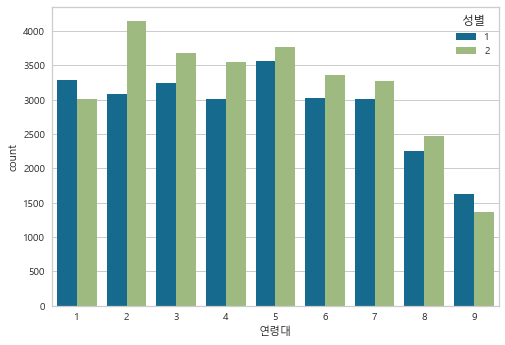

In [44]:
# 연령대별 성별 
sns.countplot(data=info_data, x="연령대", hue="성별")

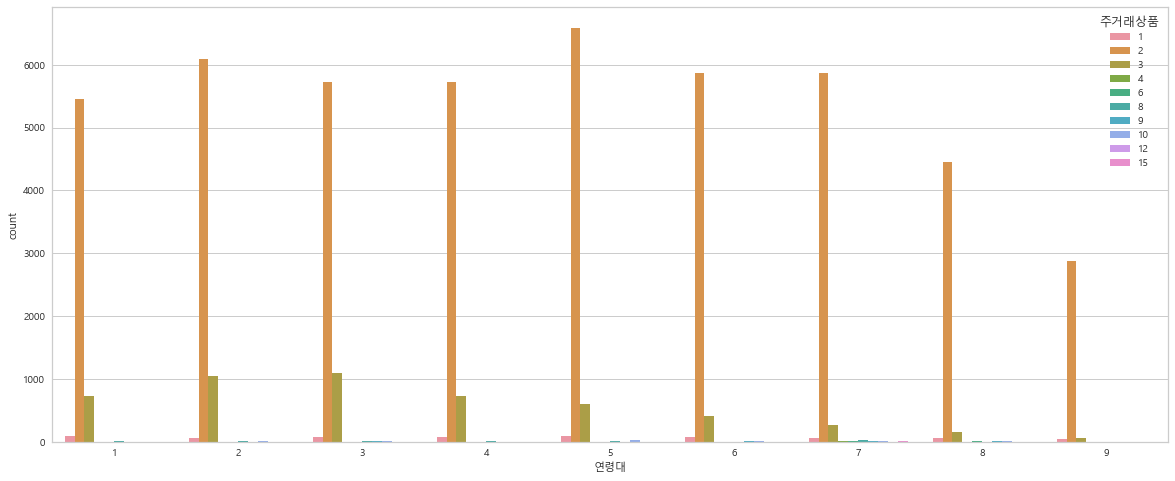

In [47]:
# 연령대별 주거래상품 
sns.countplot(data=info_data, x="연령대", hue="주거래상품")
plt.gcf().set_size_inches(20,8)

(0.0, 100.0)

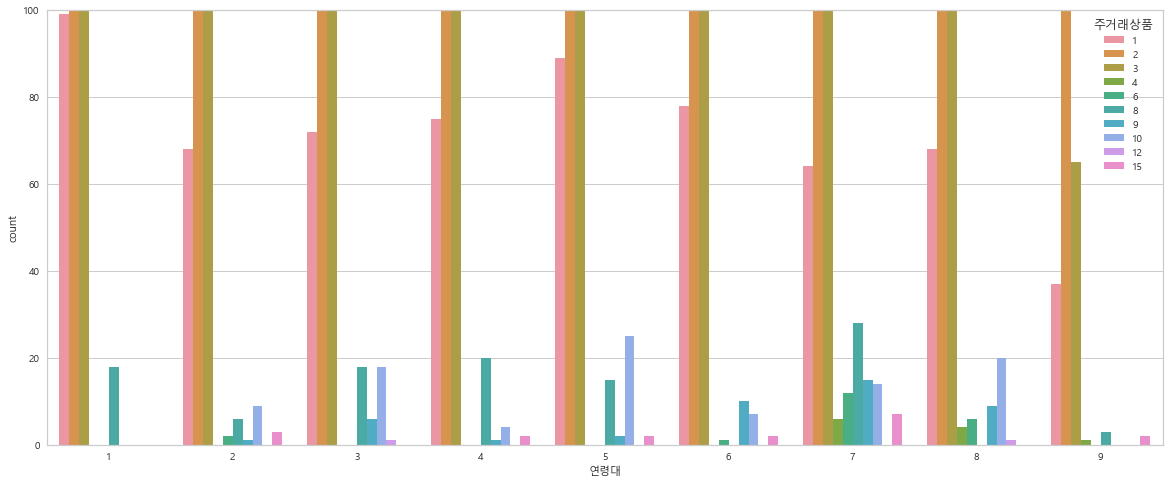

In [49]:
# 상품2,3 제외 구체적으로 비교 
sns.countplot(data=info_data, x="연령대", hue="주거래상품")
plt.gcf().set_size_inches(20,8)
plt.ylim(0,100)

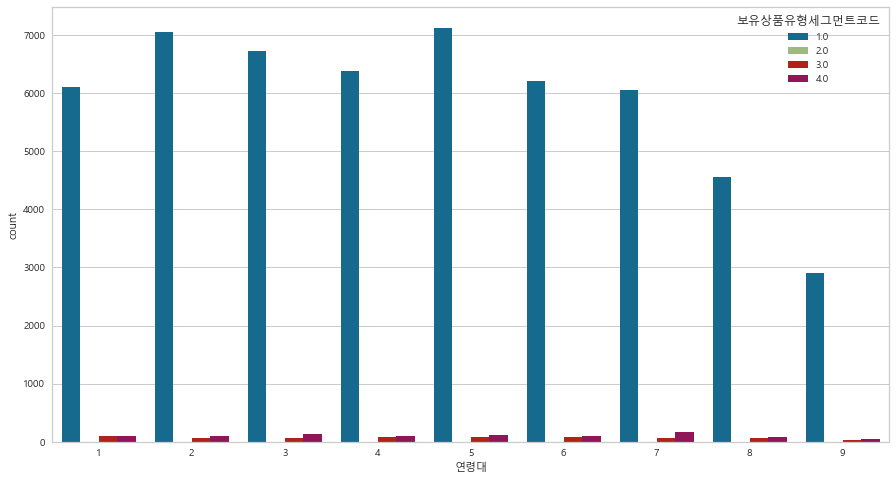

In [54]:
# 연령대별 보유상품유형 
sns.countplot(data=info_data, x="연령대", hue="보유상품유형세그먼트코드")
plt.gcf().set_size_inches(15,8)

(0.0, 200.0)

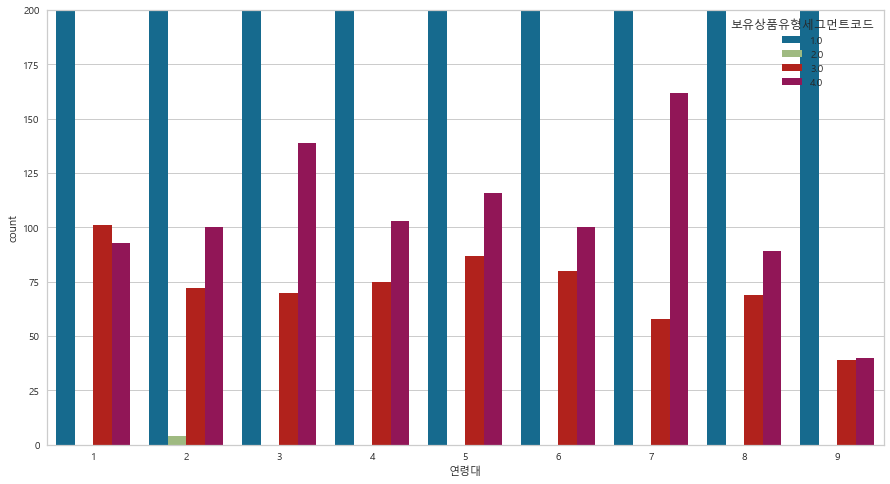

In [55]:
# 상품1 제외 구체적으로 비교
sns.countplot(data=info_data, x="연령대", hue="보유상품유형세그먼트코드")
plt.gcf().set_size_inches(15,8)
plt.ylim(0,200)

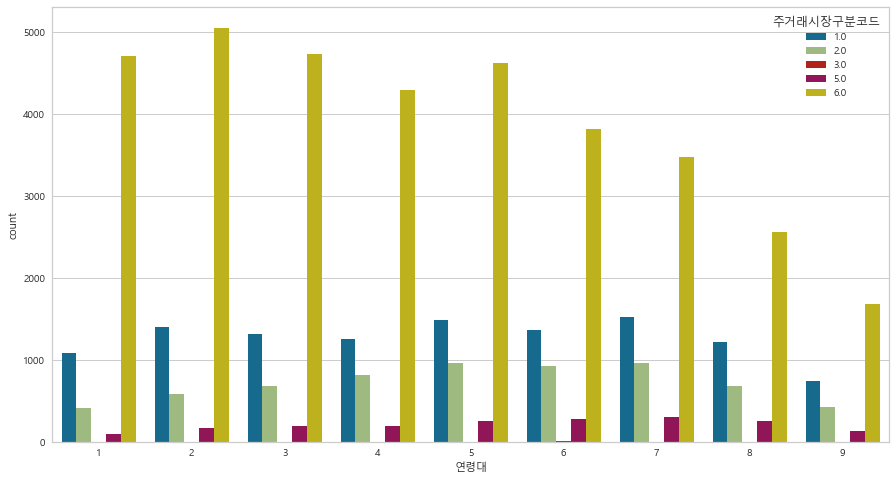

In [56]:
# 연령대별 주거래시장
sns.countplot(data=info_data, x="연령대", hue="주거래시장구분코드")
plt.gcf().set_size_inches(15,8)

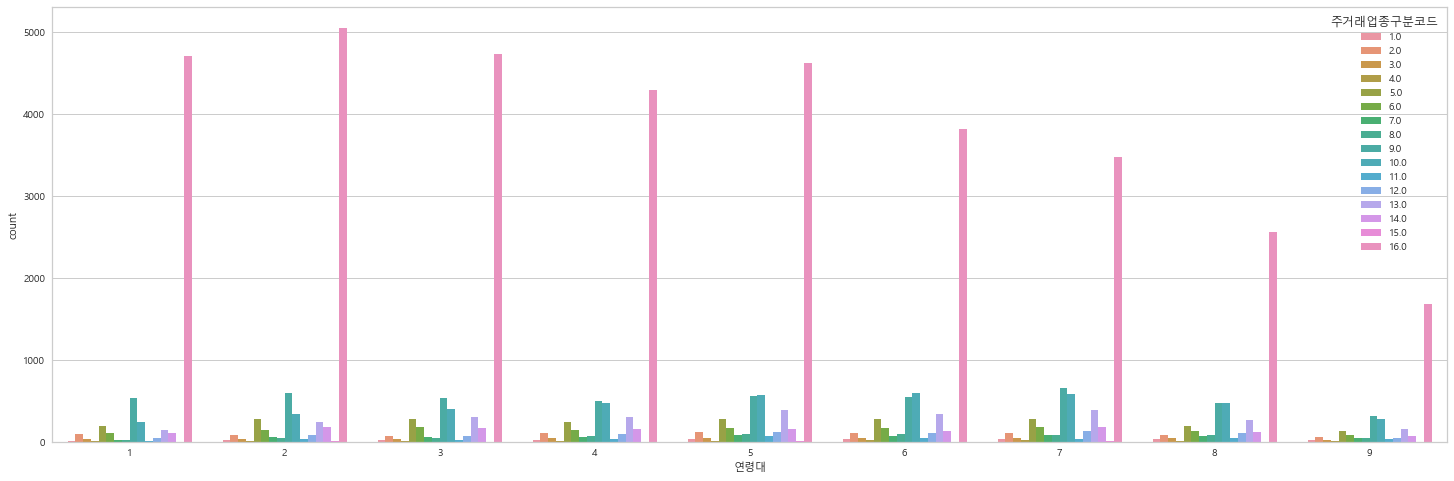

In [59]:
# 연령대별 주거래업종
sns.countplot(data=info_data, x="연령대", hue="주거래업종구분코드")
plt.gcf().set_size_inches(25,8)

(0.0, 1000.0)

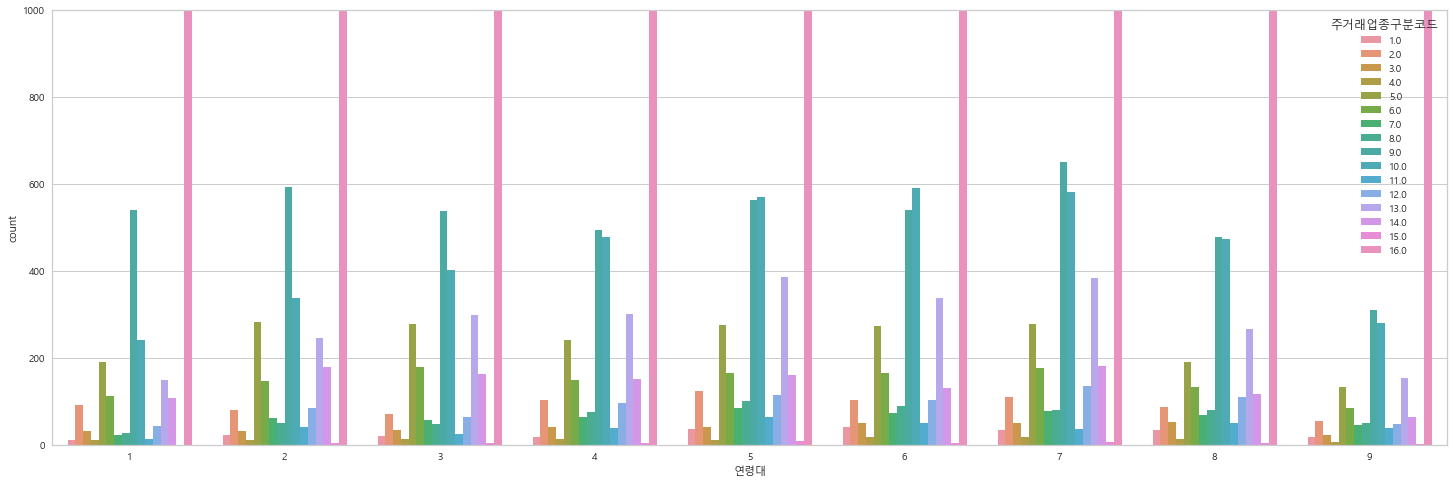

In [58]:
# 업종1 제외 구체적으로 비교 
sns.countplot(data=info_data, x="연령대", hue="주거래업종구분코드")
plt.gcf().set_size_inches(25,8)
plt.ylim(0,1000)

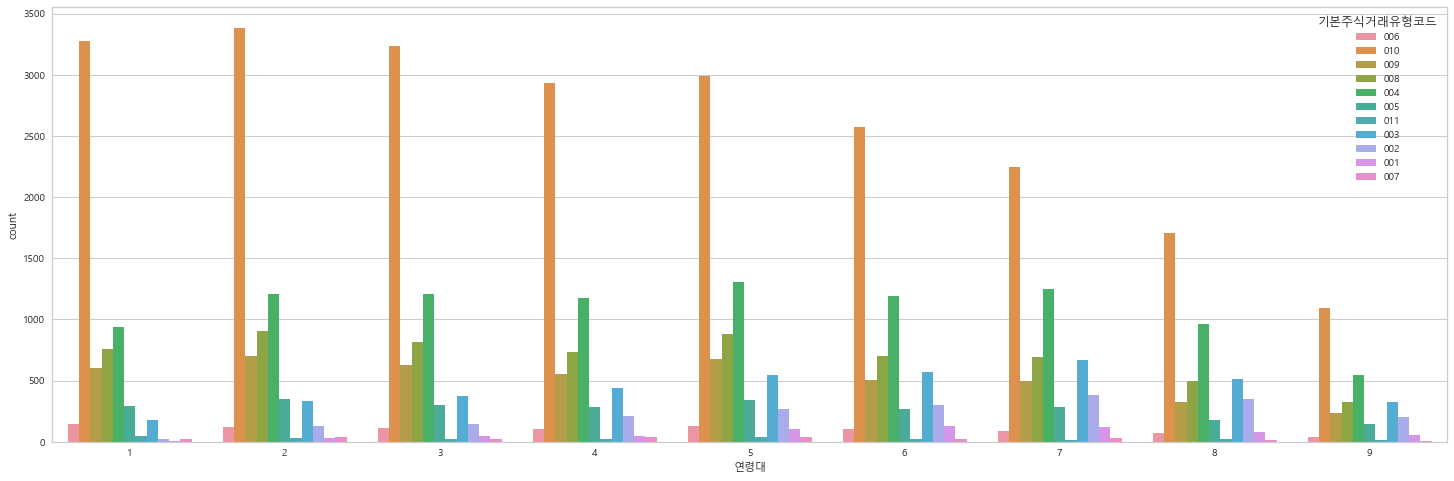

In [61]:
# 연령대별 기본주식거래유형
sns.countplot(data=info_data, x="연령대", hue="기본주식거래유형코드")
plt.gcf().set_size_inches(25,8)

* ### 라이프스테이지 세그먼트코드별 비교

<AxesSubplot:xlabel='LIFESTAGE세그먼트코드', ylabel='count'>

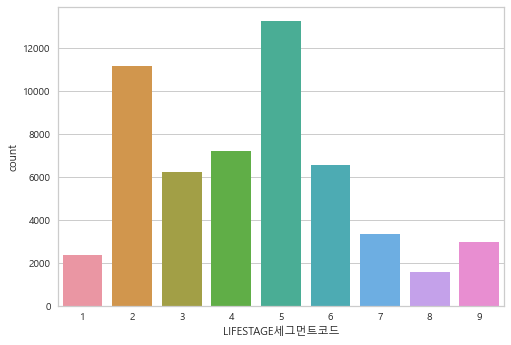

In [62]:
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드")

<AxesSubplot:xlabel='LIFESTAGE세그먼트코드', ylabel='count'>

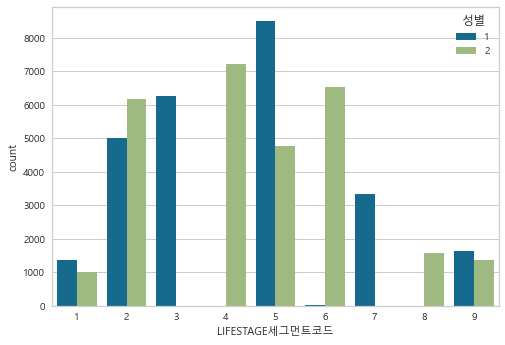

In [63]:
# 라이프스테이지별 성별 
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드", hue="성별")

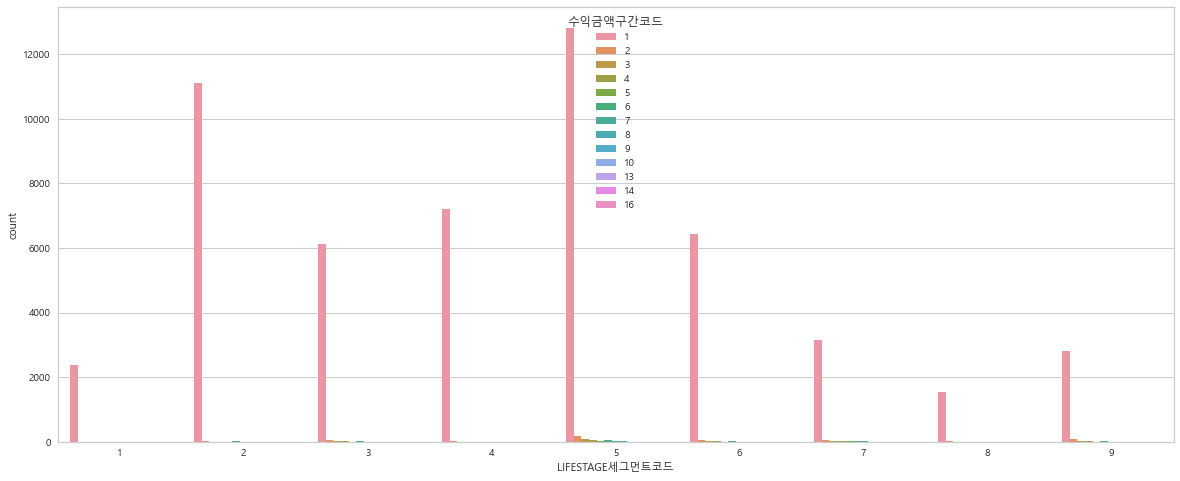

In [65]:
# 라이프스테이지별 수익금액 
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드", hue="수익금액구간코드")
plt.gcf().set_size_inches(20,8)

(0.0, 150.0)

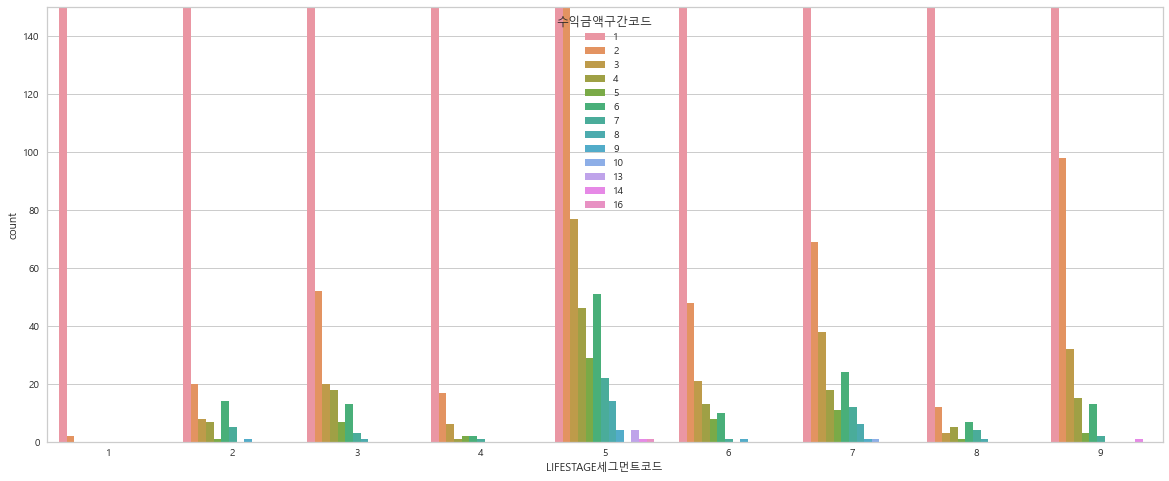

In [68]:
# 수익구간1 제외 구체적으로 비교 
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드", hue="수익금액구간코드")
plt.gcf().set_size_inches(20,8)
plt.ylim(0,150)

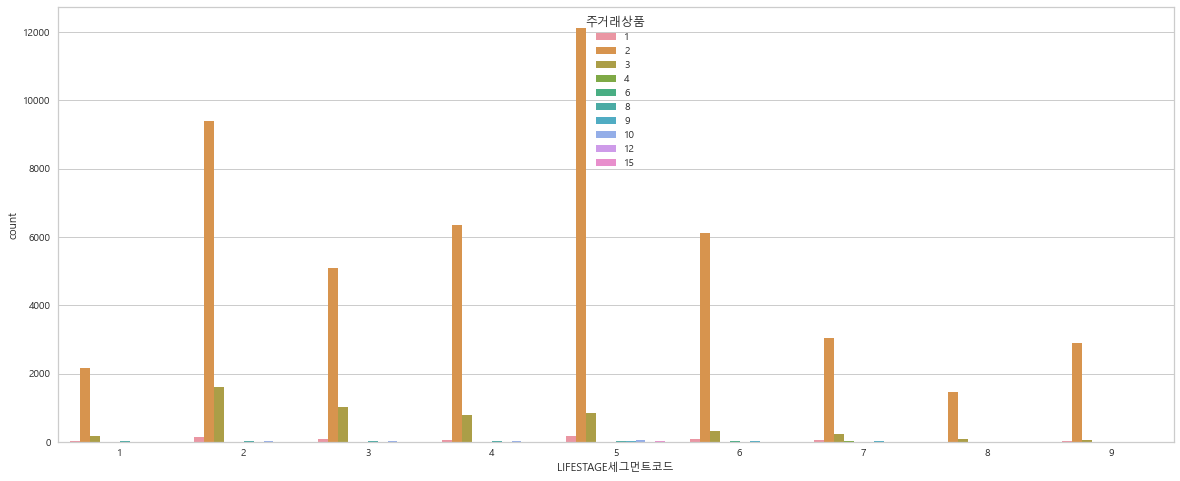

In [69]:
# 라이프스테이지별 주거래상품 
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드", hue="주거래상품")
plt.gcf().set_size_inches(20,8)

(0.0, 250.0)

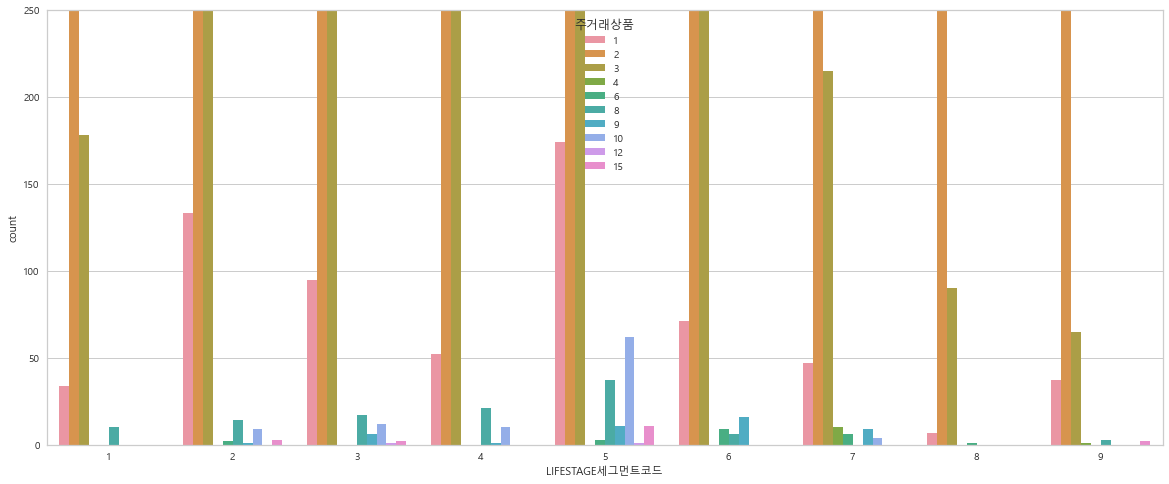

In [71]:
# 상품2,3 제외 구체적으로 비교
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드", hue="주거래상품")
plt.gcf().set_size_inches(20,8)
plt.ylim(0,250)

(0.0, 8000.0)

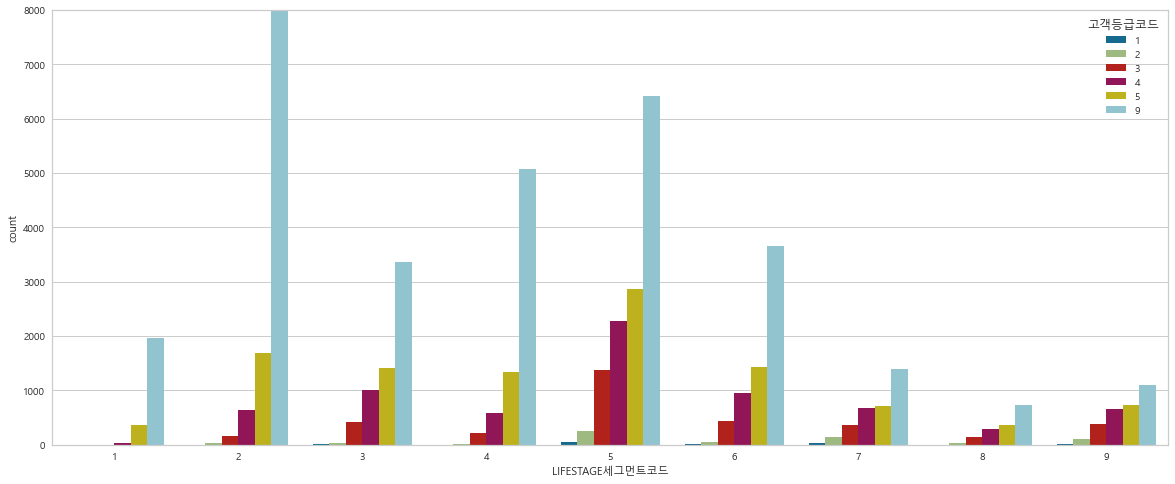

In [73]:
# 라이프스테이지별 고객등급
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드", hue="고객등급코드")
plt.gcf().set_size_inches(20,8)
plt.ylim(0,8000)

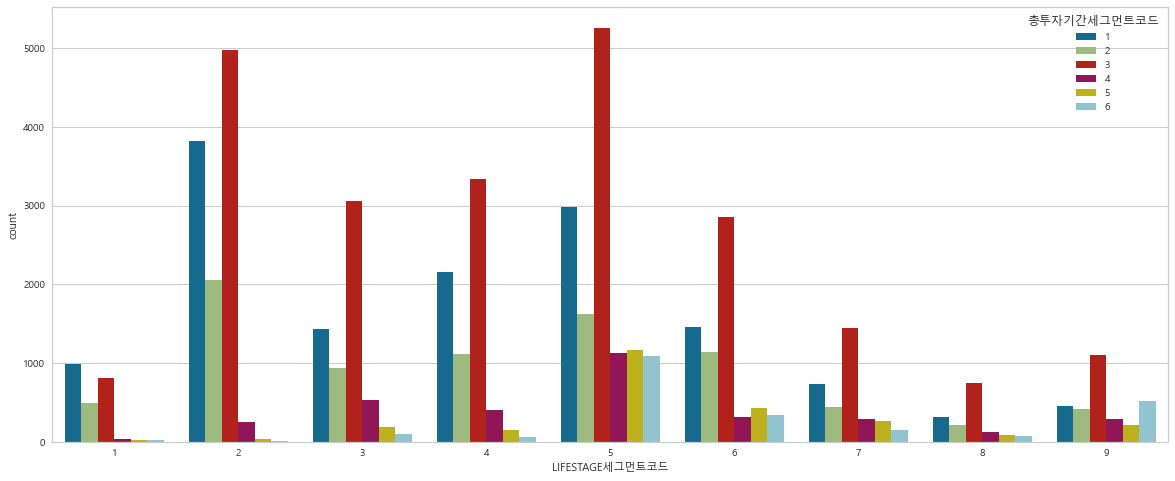

In [74]:
# 라이프스테이지별 총투자기간
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드", hue="총투자기간세그먼트코드")
plt.gcf().set_size_inches(20,8)

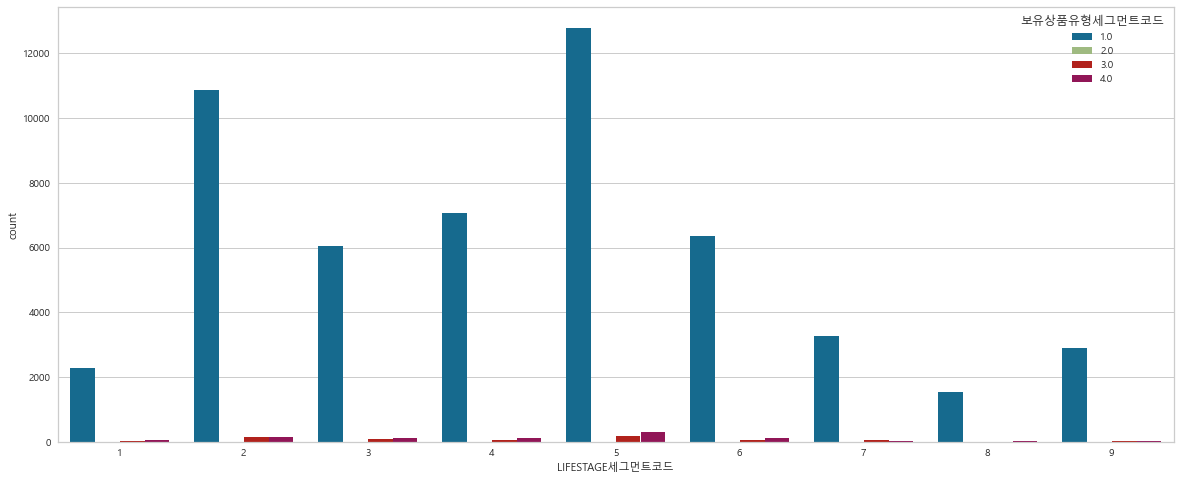

In [75]:
# 라이프스테이지별 보유상품유형 
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드", hue="보유상품유형세그먼트코드")
plt.gcf().set_size_inches(20,8)

(0.0, 500.0)

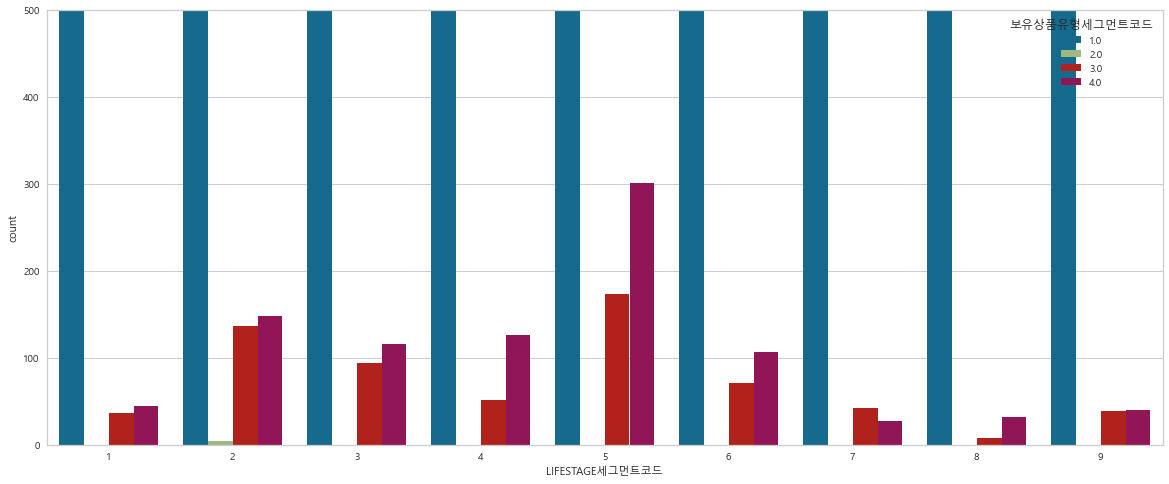

In [77]:
# 상품1 제외 구체적으로 비교 
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드", hue="보유상품유형세그먼트코드")
plt.gcf().set_size_inches(20,8)
plt.ylim(0,500)

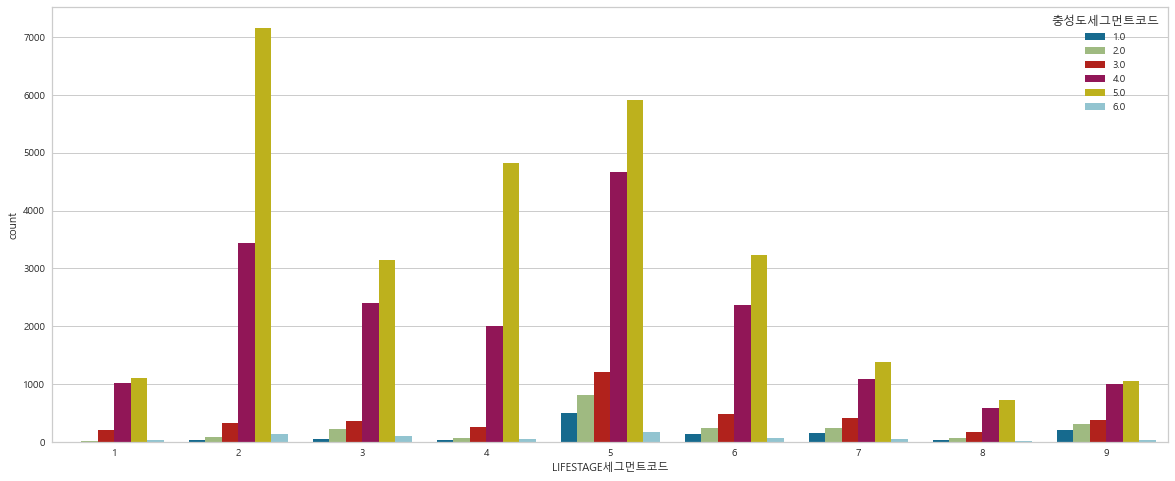

In [78]:
# 라이프스테이지별 충성도 
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드", hue="충성도세그먼트코드")
plt.gcf().set_size_inches(20,8)

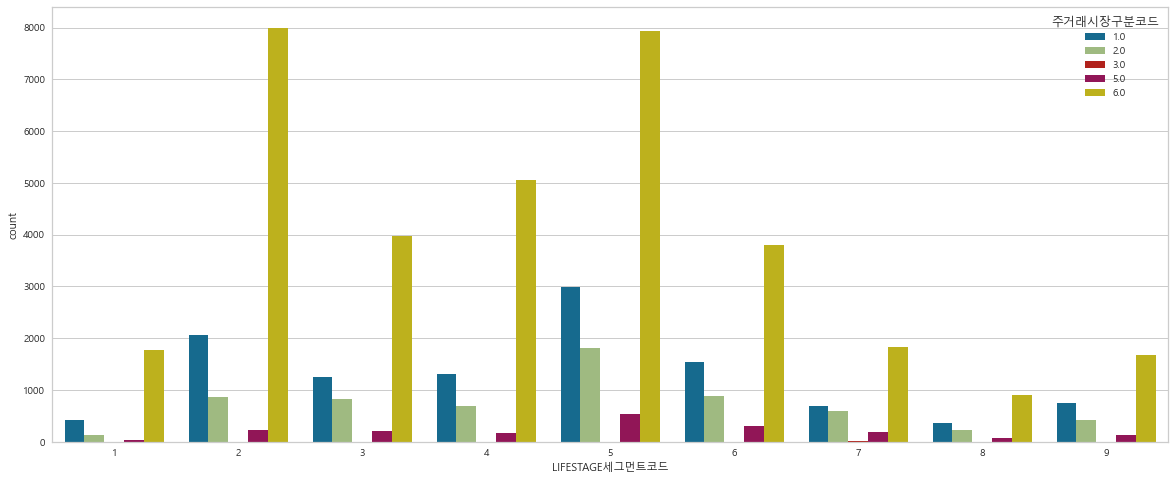

In [79]:
# 라이프스테이지별 주거래시장 
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드", hue="주거래시장구분코드")
plt.gcf().set_size_inches(20,8)

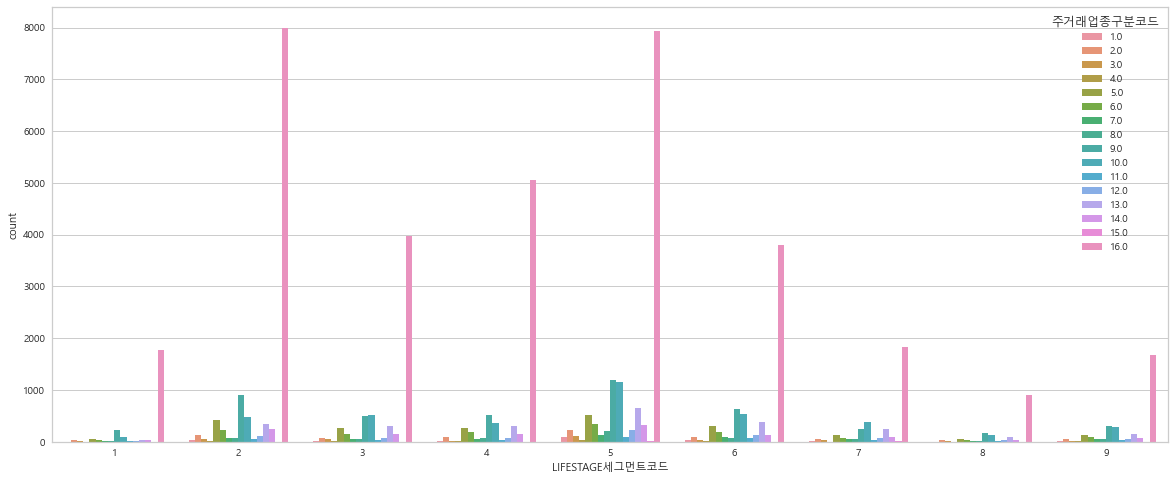

In [80]:
# 라이프스테이지별 주거래업종
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드", hue="주거래업종구분코드")
plt.gcf().set_size_inches(20,8)

(0.0, 1200.0)

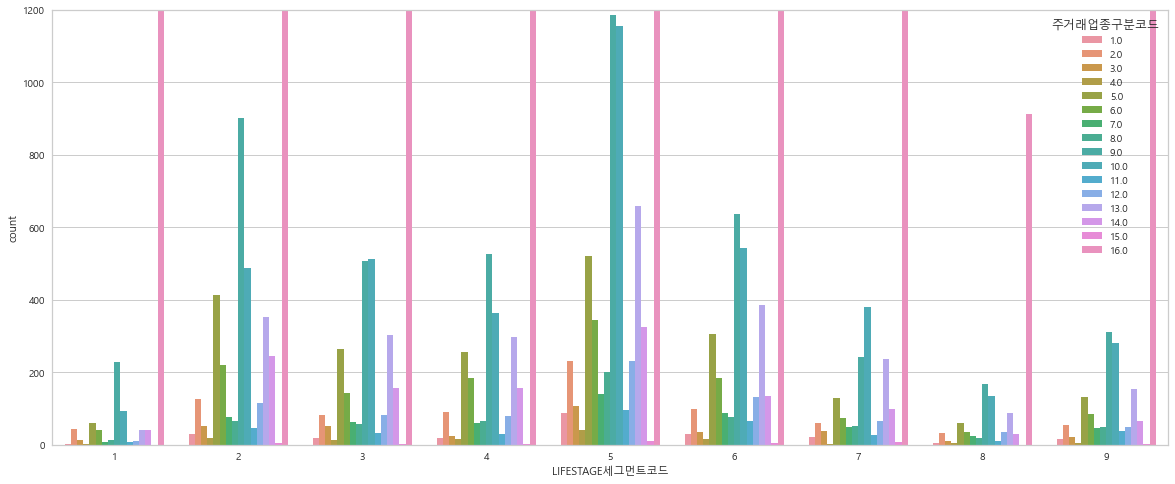

In [82]:
# 업종1 제외 구체적으로 비교 
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드", hue="주거래업종구분코드")
plt.gcf().set_size_inches(20,8)
plt.ylim(0,1200)

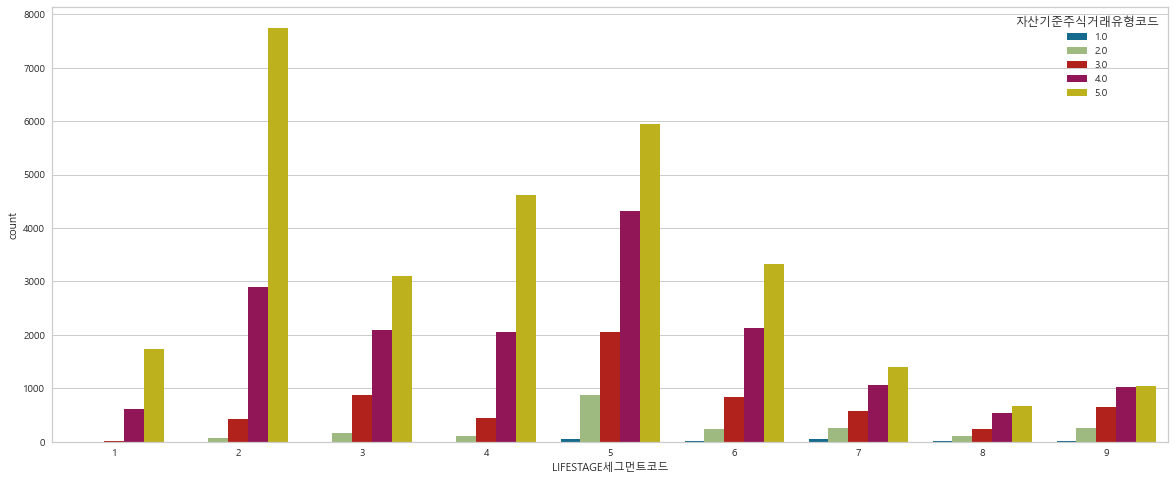

In [83]:
# 라이프스테이지별 자산기준주식거래유형 
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드", hue="자산기준주식거래유형코드")
plt.gcf().set_size_inches(20,8)

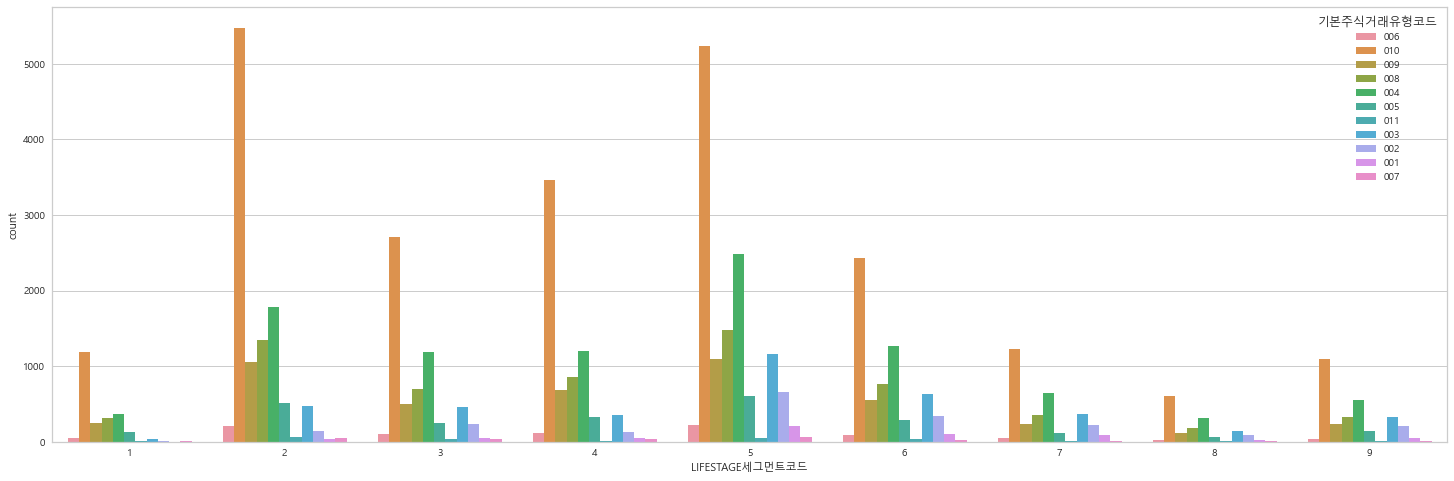

In [84]:
# 라이프스테이지별 기본주식거래유형
sns.countplot(data=info_data, x="LIFESTAGE세그먼트코드", hue="기본주식거래유형코드")
plt.gcf().set_size_inches(25,8)